In [66]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = "../data/with_stock_data.csv"
frame = pd.read_csv(data_path)
frame.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'city',
       ' state', 'country', ' linkedin url', 'current employee estimate',
       'total employee estimate', 'Score', 'reviews', 'salaries', 'interviews',
       'KMT', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe',
       'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue',
       'enterprise_value_ebitda', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_share', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth',
       'total_cash', 'total_cash_per_share', 'total_dept',
       'total_dept_per_equity', 'operating_cash_flow',
       'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week',
       'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low'],
      dtype='object')

In [7]:
def convertToClass(Y, k):
    return Y.apply(lambda elem : np.round(elem * k / 5))

# def convertToScore(Y, k):
#     return Y.apply(lambda elem : elem * 5 / k)

# Data Exploration

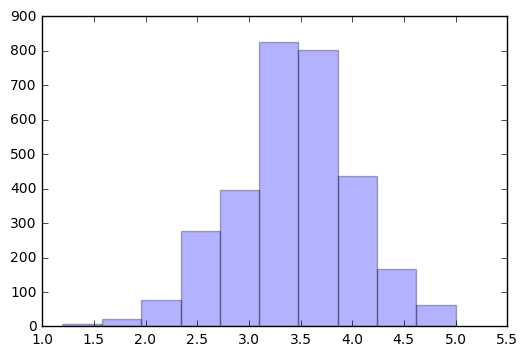

In [3]:
frame['Score']
plt.hist(frame['Score'], alpha=0.3)
plt.show()

# Feature Selection

In [4]:
# Pick Features
non_categorical_columns = ['year founded', 'current employee estimate', 'total employee estimate', 'reviews', 'salaries', 'interviews', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe', 'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue', 'enterprise_value_ebitda', 'profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share', 'quarterly_revenue_share', 'gross_profit', 'ebitda', 'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth', 'total_cash', 'total_cash_per_share', 'total_dept', 'total_dept_per_equity', 'operating_cash_flow', 'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week', 'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low']
categorical_columns = ['industry', 'size range', 'city', ' state', 'country']

In [5]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

# Linear Regression Random

In [ ]:
# Normal CV with RANDOM data
X_random = pd.DataFrame({"rand" : np.random.random(Y.shape[0])})
x_train, x_test, y_train, y_test = train_test_split(X_random, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Mean Squared Error:")
print(error)

# Training data
# print("Training Accuracy")
# pred = model.predict(X)
# print(sum(np.abs(pred - Y.values) <  0.5)/ Y.shape[0])
# y_pred = convertToClass(pred, 10)
# Y_scaled = convertToClass(Y, 10)
# confusion_m = confusion_matrix(Y_scaled, y_pred)
# print(confusion_m)

# Linear Regression

In [ ]:
# Modeling
reg = LinearRegression().fit(X, Y)
pred = reg.predict(X)

In [ ]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [ ]:
# Training Data
print("Training Mean Square Error:")
print(mean_squared_error(Y, pred))
print("Training Accuracy")
print(sum(np.abs(pred - Y.values) <  0.5)/ Y.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(Y, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

In [ ]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values) <  0.5)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
print(len(y_pred))
print(len(Y_scaled))
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

In [ ]:
# K Fold CV
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error") # also use R^2
print("Test K Fold")
scores

# Softmax

In [ ]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

In [ ]:
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

In [ ]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X, Y)

In [ ]:
# Training data
y_pred = clf.predict(X)
confusion_m = confusion_matrix(Y, y_pred)
training_accuracy = clf.score(X, Y)
print("Training Accuracy")
print(training_accuracy)
print(confusion_m)

In [ ]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Test Mean Square Error")
error = mean_squared_error(y_test, predictions)
print(error)
print("Test Accuracy")
testing_accuracy = model.score(x_test, y_test)
print(testing_accuracy)
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

In [ ]:
# Cross val score
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error") # also use R^2
print("Test K Fold Mean Squared Error")
scores

# Support Vector Machine, Kernel = rbf

In [ ]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='rbf', C=.8)
clf.fit(x_train, y_train)

In [ ]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

In [ ]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

# Support Vector Machine, Kernel = linear

In [ ]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='linear', C=1)
clf.fit(x_train, y_train)

In [ ]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

In [ ]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

# Decision Trees

In [8]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

7.0     1051
6.0      787
8.0      625
5.0      304
9.0      191
4.0       67
10.0      39
3.0        8
2.0        2
Name: y, dtype: int64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [52]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.37413582757218383
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   7   1   0   0]
 [  0   0   0   0   6  47   0   0   0]
 [  0   0   0   0  79 168   5   0   0]
 [  0   0   0   0 207 392  13   0   0]
 [  0   0   0   0 164 661  20   0   0]
 [  0   0   0   0 106 352  52   0   0]
 [  0   0   0   0  32 111   4   0   0]
 [  0   0   0   0   3  25   2   0   0]]


In [53]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.34796747967479674
[[  0   0   2  10   2   0   0]
 [  0   0  16  35   1   0   0]
 [  0   0  54 119   2   0   0]
 [  0   0  48 153   5   0   0]
 [  0   0  27  81   7   0   0]
 [  0   0  14  30   0   0   0]
 [  0   0   1   6   2   0   0]]


# Linear Discriminant Analysis

In [56]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

7.0     1051
6.0      787
8.0      625
5.0      304
9.0      191
4.0       67
10.0      39
3.0        8
2.0        2
Name: y, dtype: int64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [58]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.714111427409516
[[  1   0   0   0   0   1   0   0   0]
 [  0   3   0   0   1   1   0   0   0]
 [  0   0  35   1   3  10   1   2   0]
 [  0   2   1 169  37  17  26   5   0]
 [  0   1   2  15 481  56  62   7   2]
 [  0   0   5  26 116 556 113  13   3]
 [  0   1   2   6  39  40 400  12   1]
 [  0   0   1   1  19  18  22  95   0]
 [  0   0   0   0   3   2   7   0  16]]


In [59]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.24390243902439024
[[ 0  0  0  1  1  0  0  1]
 [ 0  0  2  6  0  4  3  0]
 [ 0  1  8 11 13 11  3  0]
 [ 0  6 13 38 48 45 10  1]
 [ 2  2 17 63 64 58 12  1]
 [ 0  3  9 39 31 37  5  0]
 [ 0  0  5  8  6 14  2  0]
 [ 0  0  1  1  6  2  0  1]]


# QDA

In [62]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

7.0     1051
6.0      787
8.0      625
5.0      304
9.0      191
4.0       67
10.0      39
3.0        8
2.0        2
Name: y, dtype: int64

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [64]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.3769825132167548
[[  2   0   0   0   0   0   0   0   0]
 [  0   3   0   0   2   0   0   0   0]
 [  0   0  34   3  17   0   2   2   1]
 [  0   0   0 167  79   7   0   0   0]
 [  0   0  18  46 438  10   9  17  88]
 [  0   0  45 127 252  75  40  54 250]
 [  0   0  23  30 155  19 154  22  84]
 [  0   0   6  10  61   5   3  39  30]
 [  0   0   0   1  13   1   0   0  15]]


In [65]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.11707317073170732
[[ 0  0  1  0  0  0  0  2]
 [ 0  1  0  3  1  1  0  2]
 [ 0  3  9 16  1  0  5 17]
 [ 0 13 28 44  4  6 18 48]
 [ 0 17 45 67  4 10 16 49]
 [ 0 15 26 42  2  9 13 31]
 [ 0  1  3 12  1  2  0 18]
 [ 0  0  0  3  0  1  0  5]]


# K Nearest Neighbors

In [78]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

7.0     1051
6.0      787
8.0      625
5.0      304
9.0      191
4.0       67
10.0      39
3.0        8
2.0        2
Name: y, dtype: int64

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [80]:
# Training data
y_pred = neigh.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.3310288735258235
[[  0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   1   4   1   0   0]
 [  0   0   0   3  26  20   4   1   0]
 [  0   0   0  23  68 117  28   1   0]
 [  0   0   0  22 283 267  49   4   0]
 [  0   0   0  26 193 532  80   1   0]
 [  0   0   0  20 126 224 134   2   0]
 [  0   0   0   8  52  70  34   0   0]
 [  0   0   0   5   6  22   0   0   0]]


In [81]:
# Testing data
y_pred = neigh.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.3008130081300813
[[  0   0   0   0   1   1   0   0]
 [  0   0   2   5   4   2   0   0]
 [  0   0   4  19  28  15   1   0]
 [  0   0  11  48  81  22   0   0]
 [  0   0   7  67 110  35   0   0]
 [  0   0   7  40  57  15   0   0]
 [  0   0   0   6  16   5   0   0]
 [  0   0   1   2   2   1   0   0]]


# PCA